In [1]:
!pip install matplotlib numpy pandas seaborn scipy

In [2]:
import numpy as np  # linear algebra
import pandas as pd  # Data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Graphics and plotting
import seaborn as sns  # Graphics and plotting
import scipy as sp  # Different purposes
import re  # Data processing
from sklearn.preprocessing import LabelEncoder  # Lable encoder for logreg
from sklearn.linear_model import LinearRegression  # Linear regressian as model
from sklearn.model_selection import train_test_split  # Dataset splitter
from sklearn.metrics import max_error  # Model score measurement

%matplotlib inline

In [3]:
df = pd.read_csv('Coffee-modified.csv')  # Read dataset
df

,ID,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,None,20.0,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1315,1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,...,Blue-Green,16.0,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00
1316,1309,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marÃ­as,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,...,Green,5.0,"June 6th, 2018",Instituto HondureÃ±o del CafÃ©,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00
1317,1310,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,...,Green,4.0,"May 24th, 2013",Asociacion Nacional Del CafÃ©,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32


In [4]:
df.columns  # Print all columns

Index(['ID', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [5]:
df.describe()

,Body,Balance,Uniformity,Clean.Cup,Sweetness,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1309.000000,1309.000000,1309.000000,1307.000000,1308.000000,1307.000000,1081.000000,1081.000000,1081.000000
mean,8.194370,8.194263,10.507448,9.833122,9.904075,3.595256,1762.026888,1811.458541,1786.742715
std,24.671369,24.672119,24.611736,0.772363,0.530960,5.352855,8779.883230,8779.208199,8779.044646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,7.330000,7.330000,10.000000,10.000000,10.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,7.500000,7.500000,10.000000,10.000000,10.000000,2.000000,1310.640000,1350.000000,1317.000000
75%,7.670000,7.750000,10.000000,10.000000,10.000000,4.000000,1600.000000,1650.000000,1600.000000
max,900.000000,900.000000,900.000000,10.000000,10.000000,55.000000,190164.000000,190164.000000,190164.000000


In [6]:
sns.set()  # Set graphics style

# График топ-10 стран производителей арабики

Text(0, 0.5, 'Country')

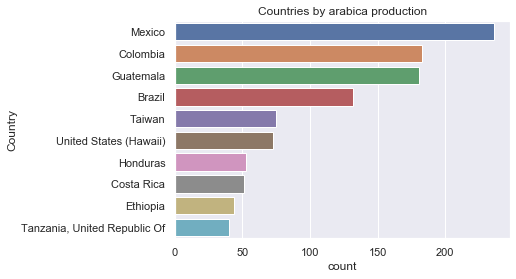

In [7]:
ax = sns.countplot(y=df['Country.of.Origin'], data=df,
                   order=df['Country.of.Origin'].value_counts().iloc[:10].index)
ax.set_title('Сountries by arabica production')
ax.set_ylabel('Country')

Больше всего зерен арабики производит Мексика, если опираться на данные из датасета

# График высот мест произростания, используем стиль графика из ДЗ №3

(<a list of 16 Line2D thetagridline objects>,
 <a list of 8 Text thetagridlabel objects>)

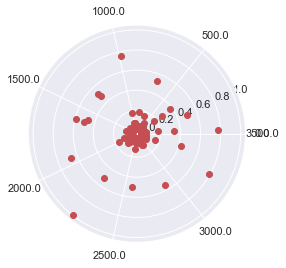

In [8]:
altitudes_sr = df['altitude_mean_meters']
altitudes_sr = altitudes_sr[altitudes_sr < 3600]
# altitudes_sr= altitudes_sr.apply(lambda x: round(x /250) * 250)
cn = pd.Series.value_counts(altitudes_sr)
cn = cn.sort_index()
theta = cn.index
r = cn.values
plt.polar(theta/max(theta)*360, r/max(r), 'or')
tk = np.linspace(0, 3500, 8)
plt.thetagrids(tk/(3500)*360, tk)

In [9]:
altitudes_sr.describe()

count    1071.000000
mean     1313.289332
std       434.978678
min         1.000000
25%      1100.000000
50%      1310.640000
75%      1600.000000
max      3500.000000
Name: altitude_mean_meters, dtype: float64

# Гистограммы запаха и цвет

In [10]:
aroma_sr = df['Aroma'].str.extract(
    r'(\d+.\d+)', expand=False).astype('float').dropna()
aroma_sr = aroma_sr.apply(lambda x: round(x * 5) / 5)

Text(0.5, 0, 'Points')

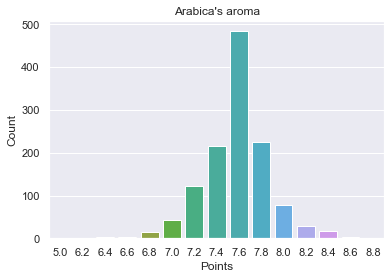

In [11]:
ax = sns.countplot(x=aroma_sr[aroma_sr <= 10])
ax.set_title('Arabica\'s aroma')
ax.set_ylabel('Count')
ax.set_xlabel('Points')

Text(0.5, 0, 'Color')

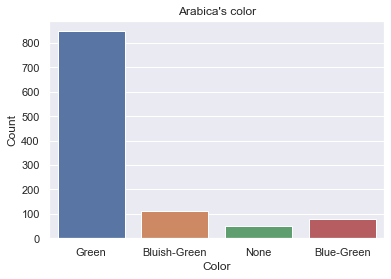

In [12]:
ax = sns.countplot(x=df['Color'])
ax.set_title('Arabica\'s color')
ax.set_ylabel('Count')
ax.set_xlabel('Color')

Как видно из гистограмм средняя оценка запаха - 7.5, самый частый цвет - зеленый.
# График корелляции запаха с оценкой качества зерна
Проверим корелляцию запаха с оценкой зерна, построим график

In [13]:
df['Cupper.Points'] = df['Cupper.Points'].str.extract(
    r'(\d+.\d+)', expand=False).astype('float').dropna()
df['Aroma'] = df['Aroma'].str.extract(
    r'(\d+.\d+)', expand=False).astype('float').dropna()

Text(0.5, 0, 'Aroma')

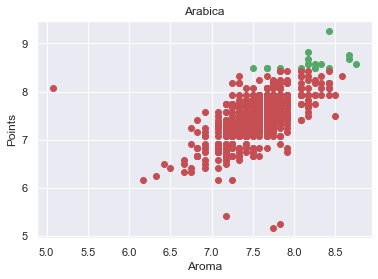

In [14]:
fig = plt.figure
ax = plt.scatter(df['Aroma'][df['Cupper.Points'] >= 8.5],
                 df['Cupper.Points'][df['Cupper.Points'] >= 8.5], color='g')
ax1 = plt.scatter(df['Aroma'][df['Cupper.Points'] < 8.5],
                  df['Cupper.Points'][df['Cupper.Points'] < 8.5], color='r')
plt.title('Arabica')
plt.ylabel('Points')
plt.xlabel('Aroma')

распределение очень похоже на би-нормальное (?)

# Гистограмма стран производителей зерна с оценкой > 8.5 

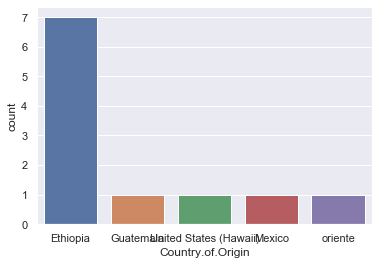

In [15]:
sns.countplot(df[df['Cupper.Points'] > 8.5]['Country.of.Origin'],
              order=df[df['Cupper.Points'] > 8.5]['Country.of.Origin']
              .value_counts().iloc[:5].index)

# Предсказание оценки кофе по уровню кислотности

In [16]:
acidity = df['Acidity'].str.extract(r'(\d+.\d+)',
                                    expand=False).astype('float').dropna()

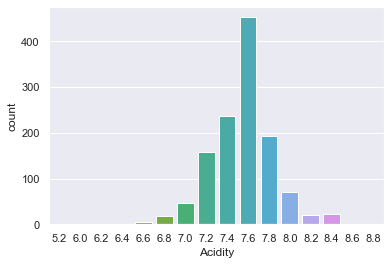

In [17]:
acidity = acidity[acidity <= 10].apply(lambda x: round(x * 5) / 5)
sns.countplot(acidity)

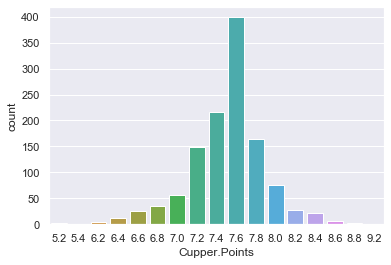

In [18]:
cup_points = df['Cupper.Points'].astype('float').dropna()
cup_points = cup_points[cup_points <= 10].apply(lambda x: round(x * 5) / 5)
sns.countplot(cup_points)

In [19]:
df['Acidity'] = df['Acidity'].apply(pd.to_numeric, errors='coerce')
df['Cupper.Points'] = df['Cupper.Points'].apply(pd.to_numeric, errors='coerce')
df = df[df['Cupper.Points'] <= 10]
df = df[df['Acidity'] <= 10]

In [20]:
df = df.dropna()
x = df['Acidity'].values.reshape(-1, 1)
y = df['Cupper.Points'].values.reshape(-1, 1)

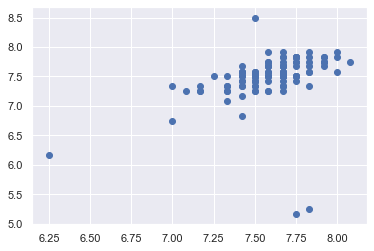

In [21]:
plt.scatter(x=x, y=y)

In [22]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y)

In [23]:
linreg = LinearRegression()
linreg.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
pred_Y = linreg.predict(test_X)

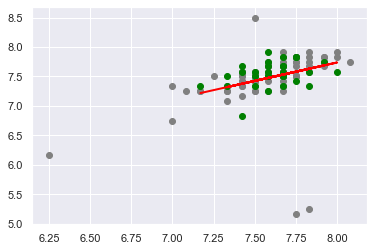

In [29]:
plt.scatter(train_X, train_Y,  color='gray')
plt.plot(test_X, pred_Y, color='red', linewidth=2)
plt.scatter(test_X, test_Y,  color='green')
plt.show()

In [26]:
max_error(test_Y, pred_Y)

0.5440303228612899